In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!pip install xlrd==2.0.1

  Obtaining dependency information for xlrd==2.0.1 from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/96.5 kB 245.8 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.5 kB 245.8 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 425.1 kB/s eta 0:00:00


In [6]:
df = pd.read_excel('Active Users (4) (1) (1).xls') #loading the data

In [7]:
df.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2


In [16]:
new_users = []
retained_users = []
resurrected_users = []
churned_users = []
total_users = []

In [17]:
weeks_data = [set(df[column].dropna()) for column in df.columns]

In [18]:
for i in range(1, len(weeks_data)):
    current_week = weeks_data[i]
    previous_week = weeks_data[i - 1]

    new = current_week - set().union(*weeks_data[:i])
    retained = current_week & previous_week
    resurrected = current_week - previous_week - new
    churned = previous_week - current_week

    new_users.append(len(new))
    retained_users.append(len(retained))
    resurrected_users.append(len(resurrected))
    churned_users.append(len(churned))
    total_users.append(len(current_week))

In [20]:
metrics_df = pd.DataFrame({
    'Week': df.columns[1:],
    'New Users': new_users,
    'Retained Users': retained_users,
    'Resurrected Users': resurrected_users,
    'Churned Users': churned_users,
    'Total Users': total_users
})

In [75]:
metrics_df.head()

,Week,New Users,Retained Users,Resurrected Users,Churned Users,Total Users,Quick Ratio
0,w2,723,931,0,828,1654,0.873188
1,w3,645,1000,87,654,1732,1.119266
2,w4,722,1169,225,563,2116,1.682060
3,w5,674,1394,125,722,2193,1.106648
4,w6,489,1479,187,714,2155,0.946779


In [22]:
#Calculation of Quick Ratio
metrics_df['Quick Ratio'] = (metrics_df['New Users'] + metrics_df['Resurrected Users']) / metrics_df['Churned Users']
metrics_df['Quick Ratio'] = metrics_df['Quick Ratio'].fillna(0) 

# Table containing - Week, New Users, Retained Users, Resurrected Users, Churned Users, Total Users, Quick Ratio

In [24]:
metrics_df

,Week,New Users,Retained Users,Resurrected Users,Churned Users,Total Users,Quick Ratio
0,w2,723,931,0,828,1654,0.873188
1,w3,645,1000,87,654,1732,1.119266
2,w4,722,1169,225,563,2116,1.682060
3,w5,674,1394,125,722,2193,1.106648
4,w6,489,1479,187,714,2155,0.946779
5,w7,860,1487,202,668,2549,1.589820
6,w8,1005,1677,193,872,2875,1.373853
7,w9,719,1839,237,1036,2795,0.922780
8,w10,621,1938,262,857,2821,1.030338
9,w11,578,1931,237,890,2746,0.915730


# Weekly Growth Accounting chart

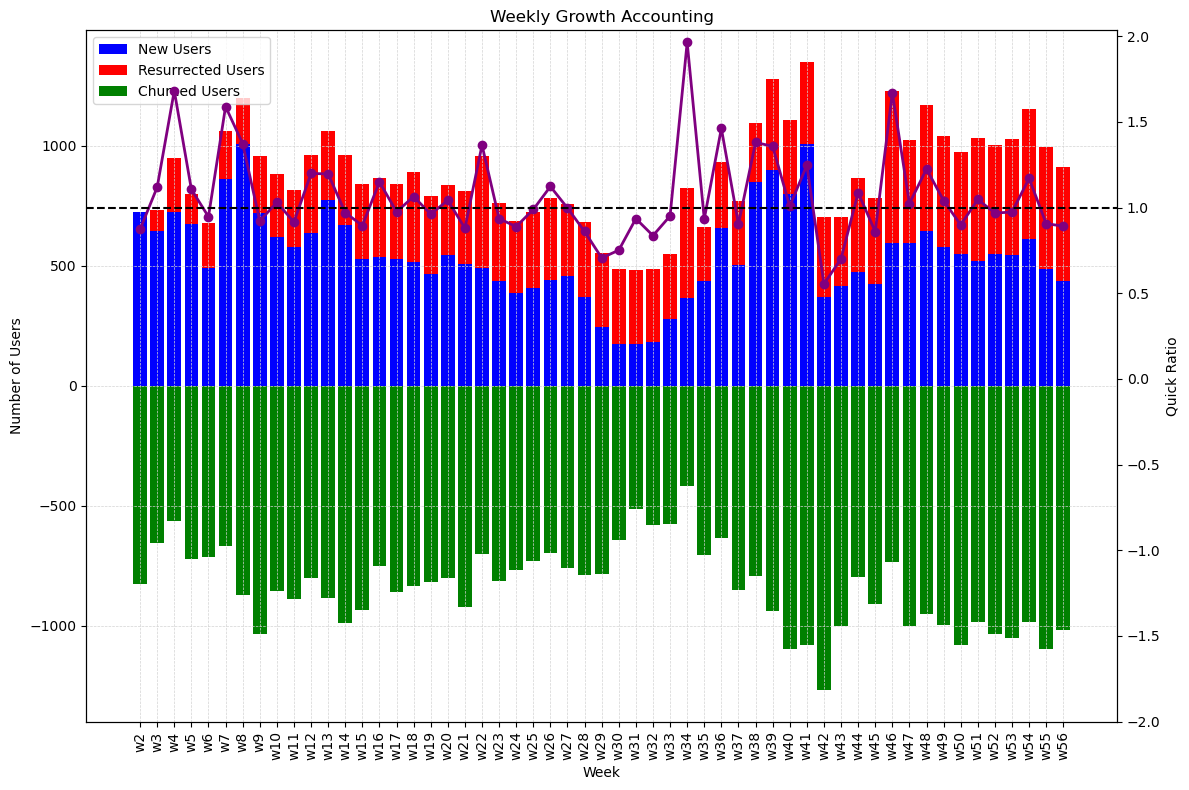

In [74]:
plt.figure(figsize=(12, 8))

plt.bar(metrics_df['Week'], metrics_df['New Users'], color='blue', label='New Users')
plt.bar(metrics_df['Week'], metrics_df['Resurrected Users'], bottom=metrics_df['New Users'], color='red', label='Resurrected Users')
plt.bar(metrics_df['Week'], -metrics_df['Churned Users'], color='green', label='Churned Users')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax2.plot(metrics_df['Week'], metrics_df['Quick Ratio'], color='purple', marker='o', label='Quick Ratio', linewidth=2)
ax2.set_ylabel('Quick Ratio')
ax2.axhline(1, color='black', linestyle='--')
ax2.set_ylim(-2,ax2.get_ylim()[1])

ax1.set_xlabel('Week')
ax1.set_ylabel('Number of Users')
ax1.set_title('Weekly Growth Accounting')
ax1.legend(loc='upper left')
ax1.set_xticks(metrics_df['Week'])
ax1.set_xticklabels(metrics_df['Week'], rotation=90)
ax1.grid(True, color='lightgray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()